In [1]:
#finding optimal k value 

In [10]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./data1.csv')
df.head()

,id,y,t,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1,walkontoe,44:19.9,0.2129,-0.7217,1.6621,10.9253,23.0713,-8.6670,-34.5081,-8.3386,-1.0931,33.8534
1,1,walkontoe,44:19.9,0.2188,-0.6841,1.7085,8.5449,24.7803,-6.6528,-34.3927,-8.1683,-1.2854,33.8564
2,1,walkontoe,44:19.9,0.2300,-0.6777,1.7251,0.1831,24.2310,-6.4697,-34.3652,-8.0035,-1.4777,33.8652
3,1,walkontoe,44:19.9,0.2358,-0.7075,1.6978,-9.2773,21.4844,-6.8359,-34.4312,-7.8662,-1.6589,33.8564
4,1,walkontoe,44:19.9,0.2378,-0.7476,1.6519,-12.8784,19.2261,-6.8359,-34.5355,-7.7454,-1.8237,33.8534


In [4]:
for column in ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']:
    df[column]=df[column].fillna(df[column].mean())

In [5]:
df=df.replace({'walkontoe':1, 'walkonheel':2, 'upstairs':3, 'downstairs':4, 'situps':5,'normalwalk':6, 'jogging':7, 'situp':8, 'upstair':9, 'downstair':10 })

In [6]:
X=df.drop(['y','t','id'],axis=1)
y=df['y']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
error_rate = []
# Will take some time
for i in range(1,50):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

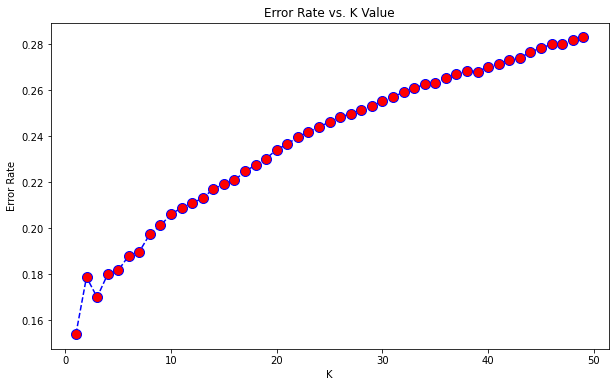

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [28]:
# k = 3 is best k value

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X_train,y_train)
pred = knn_final.predict(X_test)

print(confusion_matrix(y_test,pred))

[[2735  116    8    0    5  131   18   28   19   53]
 [ 231 2356   21    4   12  150  108   63   22   30]
 [  51   23  465    0    0    2    2    1    3   23]
 [   0    8    0  562    0   14    0    0    5    0]
 [   6   15    7    0  514    3   52   14    2    0]
 [ 182  139   14   11   11 2023    8   14   30   15]
 [ 128  193   17   10   48   43 2230  113   26   55]
 [  90  101    5    0   25   53   67 1748   17   12]
 [  27   45    3    1    1   23    8    7 1237    0]
 [ 109   62   19    1    1   23   27   31    0 1105]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.77      0.88      0.82      3113
           2       0.77      0.79      0.78      2997
           3       0.83      0.82      0.82       570
           4       0.95      0.95      0.95       589
           5       0.83      0.84      0.84       613
           6       0.82      0.83      0.82      2447
           7       0.88      0.78      0.83      2863
           8       0.87      0.83      0.85      2118
           9       0.91      0.91      0.91      1352
          10       0.85      0.80      0.83      1378

    accuracy                           0.83     18040
   macro avg       0.85      0.84      0.84     18040
weighted avg       0.83      0.83      0.83     18040



In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.83009977827051